## Import Libraries

In [1]:
import tensorflow as tf
import os

### Remove Dodgy Images

In [2]:
import cv2
import imghdr

C:\Users\Soumyojyoti Saha\AppData\Local\Temp\ipykernel_4948\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = r"C:\Users\Soumyojyoti Saha\OneDrive - vit.ac.in\Documents\fake logo detection vit\vit ml model\neww_train"

In [4]:
os.listdir(data_dir)

['fake', 'original']

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### Loading the Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt  
import tensorflow as tf

In [8]:
data = tf.keras.utils.image_dataset_from_directory( r"C:\Users\Soumyojyoti Saha\OneDrive - vit.ac.in\Documents\fake logo detection vit\vit ml model\neww_train")

Found 618 files belonging to 2 classes.


In [9]:
data_iterator=data.as_numpy_iterator()

In [10]:
batch=data_iterator.next() #Get another batch from the iterator

In [11]:
batch[0].shape #Images represented as numpy arrays

(32, 256, 256, 3)

In [12]:
batch[1] # class 0 - Fake, class 1 - Real

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

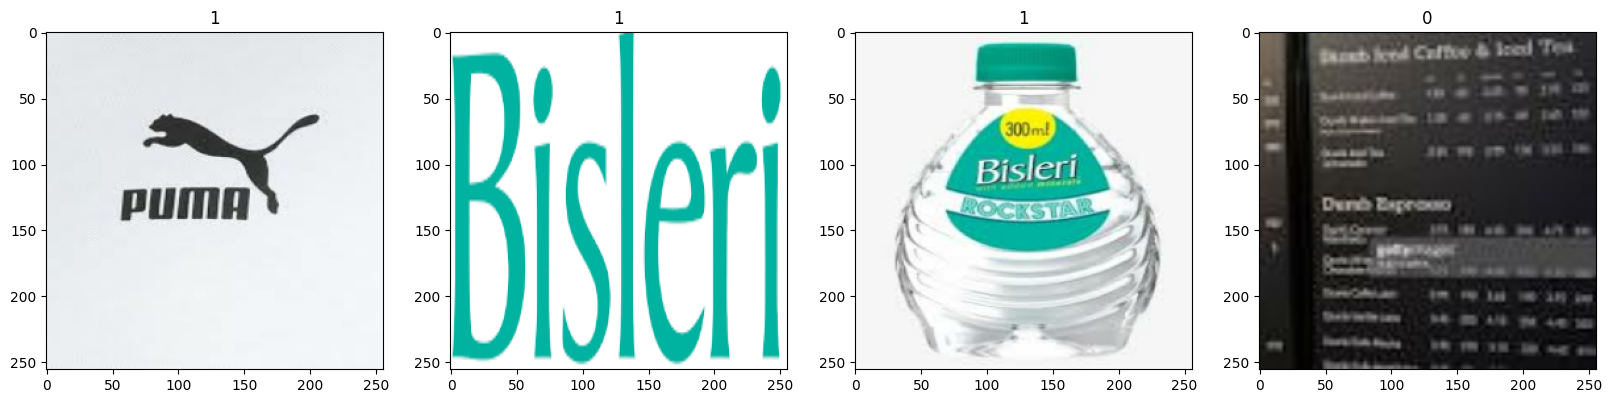

In [13]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

#### Scale Data

In [14]:
data=data.map(lambda x,y:(x/255,y))

In [15]:
scaled_iterator=data.as_numpy_iterator()

In [16]:
batch=scaled_iterator.next()

In [17]:
batch[0].min()

0.0

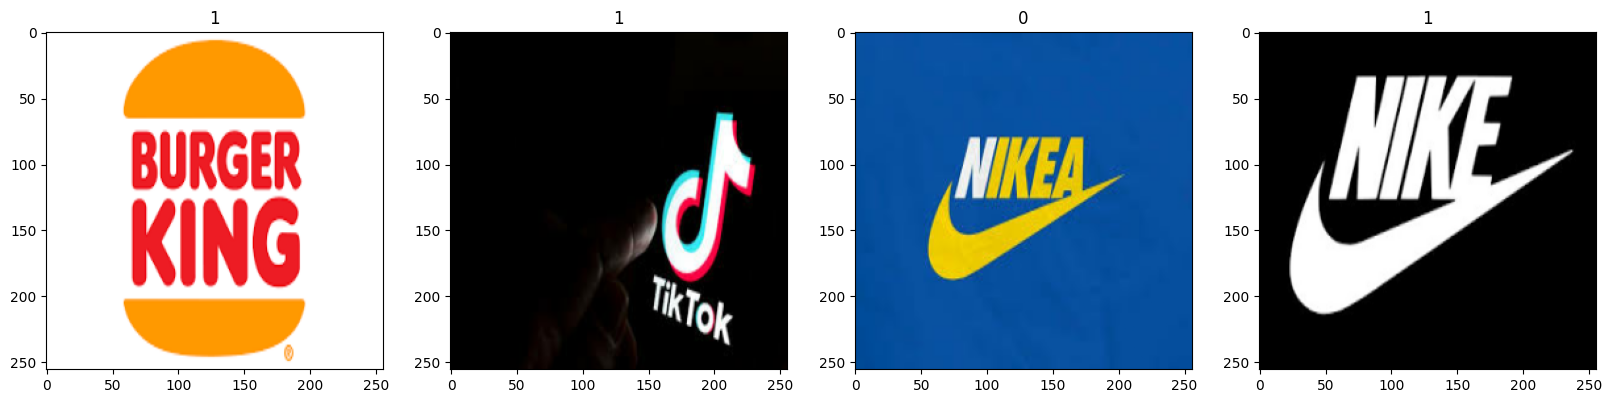

In [18]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [19]:
len(data)

20

In [20]:
train_size=int(len(data)*.6)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+2

In [21]:
train_size

12

In [22]:
val_size

4

In [23]:
test_size

4

In [24]:
train_size+val_size+test_size

20

In [25]:
train=data.take(train_size)
val=data.take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [26]:
len(train)

12

In [27]:
len(test)

4

In [28]:
len(val)

4

### Building Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [30]:
model=Sequential()

In [31]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Training

In [34]:
logdir='logs'

In [35]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


12/12 [==============================] - 6s 312ms/step - loss: 0.7916 - accuracy: 0.5182 - val_loss: 0.6882 - val_accuracy: 0.6406
Epoch 2/20
12/12 [==============================] - 4s 304ms/step - loss: 0.6885 - accuracy: 0.5651 - val_loss: 0.6781 - val_accuracy: 0.6719
Epoch 3/20
12/12 [==============================] - 4s 293ms/step - loss: 0.6712 - accuracy: 0.6016 - val_loss: 0.6283 - val_accuracy: 0.7422
Epoch 4/20
12/12 [==============================] - 4s 303ms/step - loss: 0.6150 - accuracy: 0.6562 - val_loss: 0.5140 - val_accuracy: 0.7578
Epoch 5/20
12/12 [==============================] - 4s 307ms/step - loss: 0.5070 - accuracy: 0.7682 - val_loss: 0.3900 - val_accuracy: 0.8281
Epoch 6/20
12/12 [==============================] - 4s 290ms/step - loss: 0.4168 - accuracy: 0.8021 - val_loss: 0.3438 - val_accuracy: 0.8359
Epoch 7/20
12/12 [==============================] - 4s 305ms/step - loss: 0.3298 - accuracy: 0.8307 - val_loss: 0.3056 - val_accuracy: 0.8594
Epoc

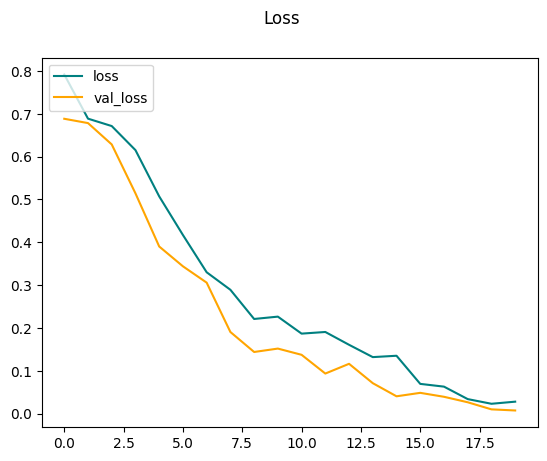

In [37]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper left')
plt.show()

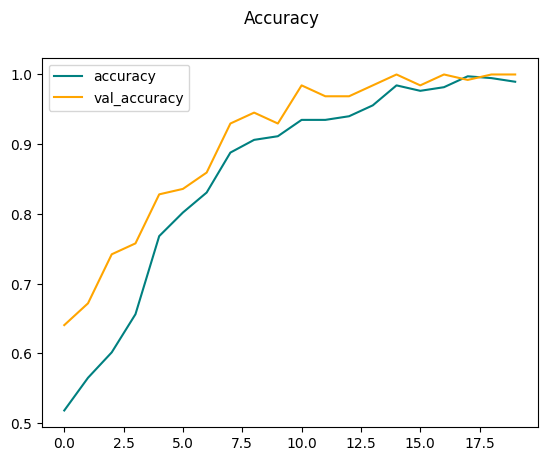

In [38]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper left')
plt.show()

### Evaluate Performance

In [39]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [40]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 111ms/step


In [42]:
print('Precision',pre.result().numpy())
print('Recall',re.result().numpy())
print('Accuracy',acc.result().numpy())

Precision 0.94736844
Recall 1.0
Accuracy 0.9716981


### Testing

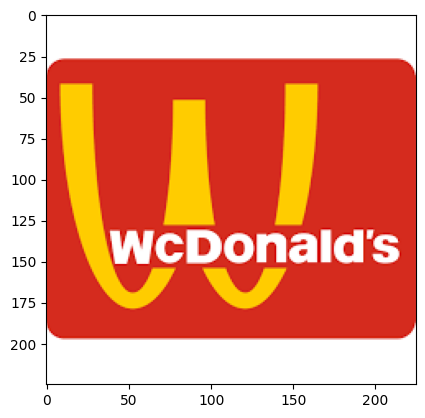

In [43]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r"C:\Users\Soumyojyoti Saha\OneDrive - vit.ac.in\Documents\fake logo detection vit\vit ml model\neww_train\fake\images (14).png")

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

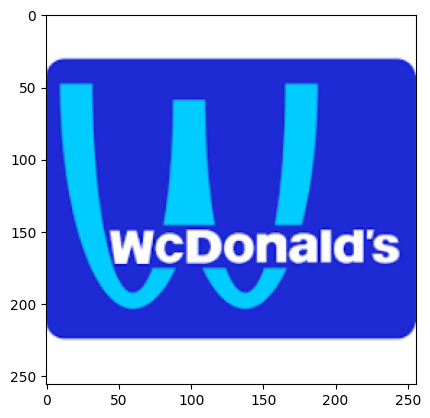

In [44]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [45]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 31ms/step


In [46]:
yhat

array([[0.00146538]], dtype=float32)

In [47]:
if yhat>0.5:
    print(f'Predicted Image is Fake')
else:
    print(f'Predicted Image is Real')

Predicted Image is Real


### Save The Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
import os
model.save(os.path.join('models','fldetection.h5'))

c:\Users\Soumyojyoti Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
new_model=load_model(os.path.join('models','fldetection.h5'))

In [51]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 86ms/step


In [52]:
if yhat>0.5:
    print(f'Predicted Image is Fake')
else:
    print(f'Predicted Image is Real')

Predicted Image is Real
